# Star Wars - Are the Oldies Better?
In order to determine which Star Wars movies are more popular, the team at [FiveThirtyEight](https://fivethirtyeight.com) decided to create a survey and collect data from their users.

We will use their [collected responses](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) to answer following questions:
- Which film do respondents like the most?
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?

In [1]:
### Opening and exploring the data set - we'll do some cleaning before using the data

# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # Data processing
import numpy as np # Linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("colorblind")

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [3]:
star_wars = star_wars[star_wars['RespondentID'].notnull()] # eliminate rows without a respondent ID

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Converting Data into boolean values
There are a few columns that require some data conversion to simplify the analysis of the dataset. 
Below we will proceed converting the values of following columns:
- *Have you seen any of the 6 films in the Star Wars franchise?*: Yes/No values will be converted to True/False.
- *Do you consider yourself to be a fan of the Star Wars film franchise?*: Same as above.
- *Unnamed: 4 to Unnamed: 8*: These columns show if the respondent has seen the movies from Episode I to Episode VI. We will modify the column names to seen_1 to seen_6 and the values to True/False
- *Unnamed: 10 to Unnamed 14*: They rank the movies from 1 to 6. Column names will be modified to ranking_1 to ranking_6.


In [5]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
yes_no = {
    "Yes":True,
    "No":False
}

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
mapping_films = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False
}

for col in star_wars.columns[3:9]:
    star_wars[col]=star_wars[col].map(mapping_films)
    
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [10]:
movies_col_name = {}

for i in range(3,9):
    movies_col_name[star_wars.columns[i]] = "seen_{}".format(i-2)

star_wars = star_wars.rename(columns=movies_col_name)

star_wars[star_wars.columns[3:9]].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


In [11]:
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3


In [12]:
ranking_col_name = {}

for i in range(9,15):
    ranking_col_name[star_wars.columns[i]] = "ranking_{}".format(i-8)
    
star_wars = star_wars.rename(columns=ranking_col_name) ###change column names

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars[star_wars.columns[9:15]].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


## Data Analysis
After having cleaned the data we will proceed to analyze it using frequency tables and data visualization.

### What film do respondents like the most?
As seen in the first two plots, we can extract following results:
- Highest rating: Star Wars: Episode 3.
- Lowest rating: Star Wars: Episode 5.
- Most watched: Star Wars: Episode 5.
- Least watched: Star Wars: Episode 3.

It seems like the least watched movie has the highest rating and viceversa. Strange, right?

<Figure size 432x288 with 0 Axes>

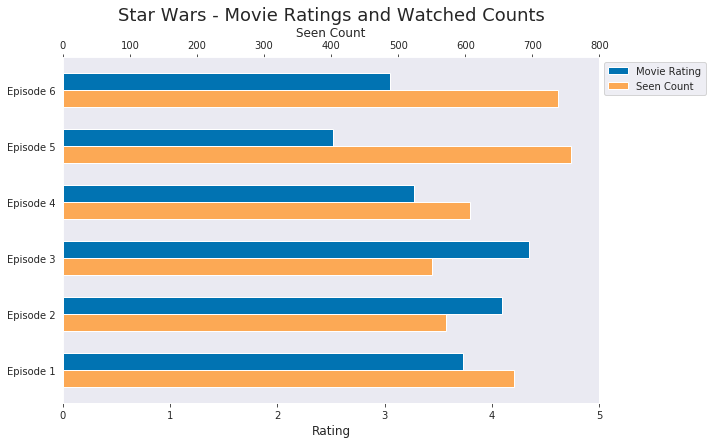

In [45]:
movies_index = ['Episode {}'.format(i) for i in range(1,7)]
ranking_means = star_wars[star_wars.columns[9:15]].mean().tolist()
seen_movies = star_wars[star_wars.columns[3:9]].sum().tolist()

sns.set_style('dark')
sns.despine()
fig, ax1 = plt.subplots(figsize=(10,6));

bar_width = 0.3
bar_position = np.arange(len(movies_index))

ax1.set_xlabel('Rating',fontsize=12);
ax1.set_xlim([0,5])
ax1.set_yticks(np.arange(6));
ax1.set_yticklabels(movies_index);
plot1 = ax1.barh(
    bar_position + bar_width/2, 
    ranking_means,bar_width,align='center',label='Movie Rating');

# Finish: Add formatted values next to bars
# for i, v in enumerate(ranking_means):
#     ax1.text(v + 3, i + .25, str(v))
    
ax2 = ax1.twiny();

ax2.set_yticks(np.arange(6));
ax2.set_yticklabels(movies_index);
ax2.set_xlabel('Seen Count',fontsize=12);
ax2.set_xlim([0,800])
plot2 = ax2.barh(
    bar_position - bar_width/2, 
    seen_movies,bar_width,color='#FCA955',align='center',label='Seen Count');

# Defining the legends for both plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, bbox_to_anchor=(1.0,1))

fig.tight_layout();
ax2.set_title('Star Wars - Movie Ratings and Watched Counts',fontsize=18);

### Movies watched and ranking per gender
In the two plots below, we can see how, even with a highest absolute number of female participants, there are more male participants who have watched the Star Wars movies. 
In the two plots below the movies watched, we can see similarities in the ratings entered by the male and female group.

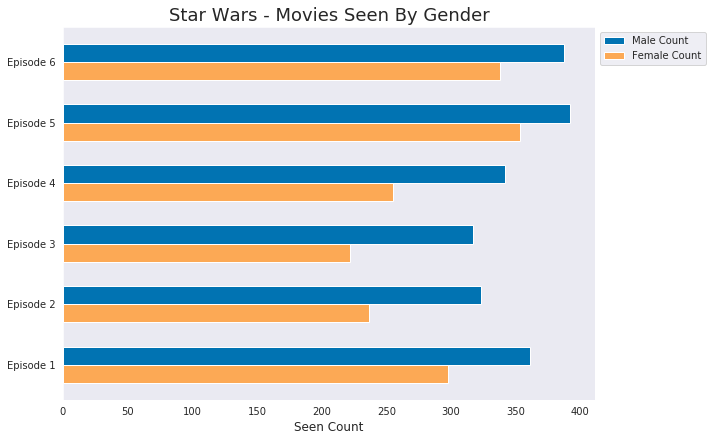

In [34]:
gender_participants = star_wars['Gender'].value_counts(dropna=False)

males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

seen_male = males.iloc[:,3:9].sum().tolist()
seen_female = females.iloc[:,3:9].sum().tolist()

fig, ax1 = plt.subplots(figsize=(10,6));

ax1.set_xlabel('Seen Count',fontsize=12);
ax1.set_yticks(np.arange(6));
ax1.set_yticklabels(movies_index);
plot1 = ax1.barh(
    bar_position + bar_width/2, 
    seen_male,bar_width,align='center',label='Male Count');


plot2 = ax1.barh(
    bar_position - bar_width/2, 
    seen_female,bar_width,color='#FCA955',align='center',label='Female Count');

ax1.legend(bbox_to_anchor=(1.0,1))
fig.tight_layout();
ax1.set_title('Star Wars - Movies Seen By Gender',fontsize=18);

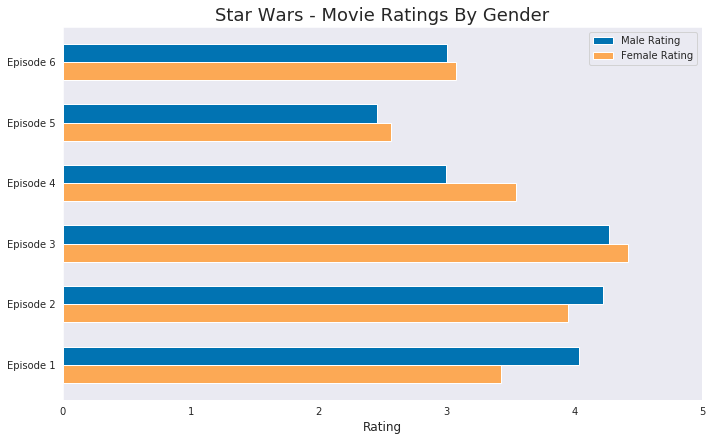

In [39]:
ratings_male = males.iloc[:,9:15].mean().tolist()
ratings_female = females.iloc[:,9:15].mean().tolist()

fig, ax1 = plt.subplots(figsize=(10,6));

ax1.set_xlabel('Rating',fontsize=12);
ax1.set_yticks(np.arange(6));
ax1.set_yticklabels(movies_index);
ax1.set_xlim([0,5]);
plot1 = ax1.barh(
    bar_position + bar_width/2, 
    ratings_male,bar_width,align='center',label='Male Rating');

plot2 = ax1.barh(
    bar_position - bar_width/2, 
    ratings_female,bar_width,color='#FCA955',align='center',label='Female Rating');

ax1.legend(bbox_to_anchor=(1.0,1))
fig.tight_layout();
ax1.set_title('Star Wars - Movie Ratings By Gender',fontsize=18);

In [16]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>
